In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd

In [5]:
path = "/content/drive/MyDrive/Space_Corrected.csv"
df = pd.read_csv(path)

In [6]:
!pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from iso3166 import countries
from datetime import datetime, timedelta
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


**DATA PROCESSING**

In [10]:
df['DateTime'] = pd.to_datetime(df['Datum'])
#getting launch year
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)
#getting country from where launch occured
df['Country'] = df['Location'].apply(lambda location: location.split(", ")[-1])
#getting launch day 
df['Day'] = df['Datum'].apply(lambda datum: datum.split()[0])
#getting launch month
df['Month'] = df['Datum'].apply(lambda datum: datum.split()[1])
#getting date of launch in a month
df['Date'] = df['Datum'].apply(lambda datum: datum.split()[2][:2]).astype(int)
#getting hour of launch
df['Hour'] = df['Datum'].apply(lambda datum: int(datum.split()[-2][:2]) if datum.split()[-1]=='UTC' else np.nan)

In [11]:
list_countries = {'Gran Canaria': 'USA', 
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'USA', 
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of', 
                'Yellow Sea': 'China', 
                'New Mexico': 'USA',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': 'Korea, Democratic People\'s Republic of',
                'Pacific Ocean': 'United States Minor Outlying Islands',
                'South Korea': 'Korea, Republic of'}
for country in list_countries:
    df.Country = df.Country.replace(country, list_countries[country])

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country,Day,Month,Date,Hour
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.0
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China,Thu,Aug,6,4.0
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA,Tue,Aug,4,23.0
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan,Thu,Jul,30,21.0
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA,Thu,Jul,30,11.0


<Axes: xlabel='count', ylabel='Company Name'>

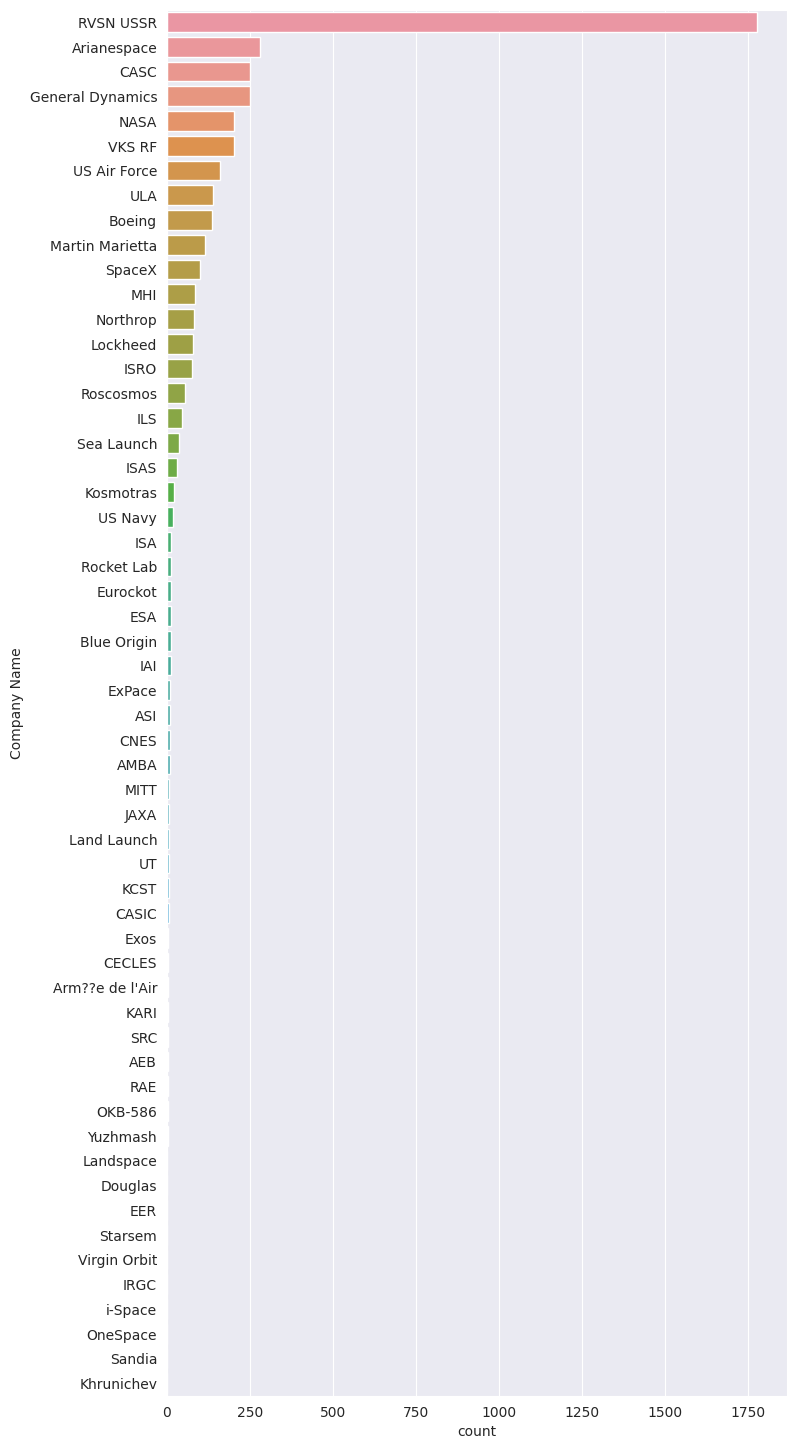

In [13]:
plt.figure(figsize=(8, 18))
sns.countplot(y='Company Name', data=df, order=df['Company Name'].value_counts().index)

(0.0, 1500.0)

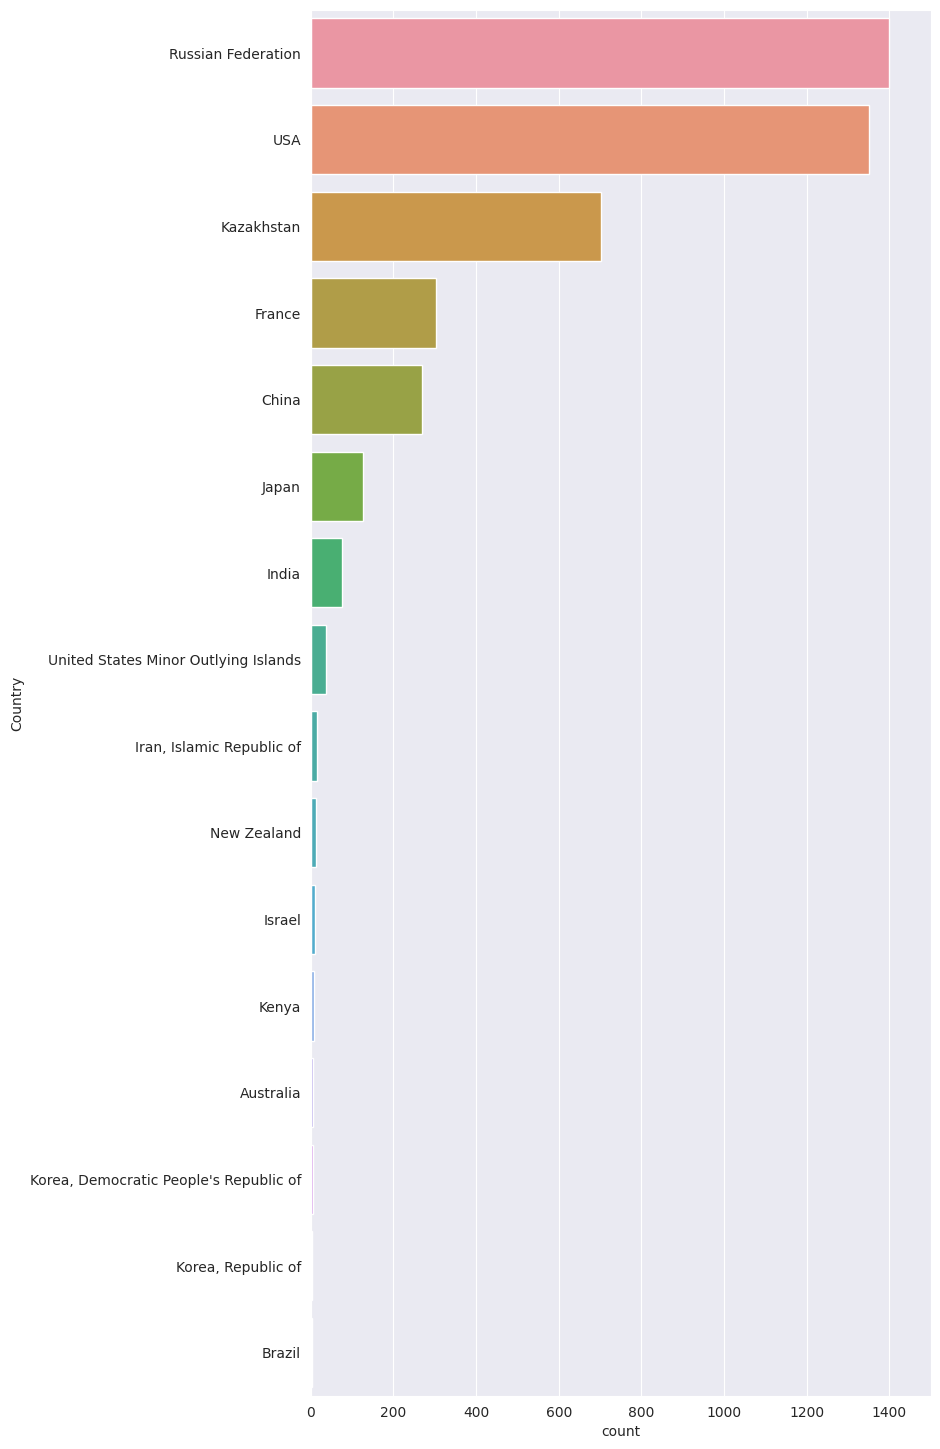

In [14]:
plt.figure(figsize=(8, 18))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.xlim(0, 1500)

<Axes: xlabel='count', ylabel='Location'>

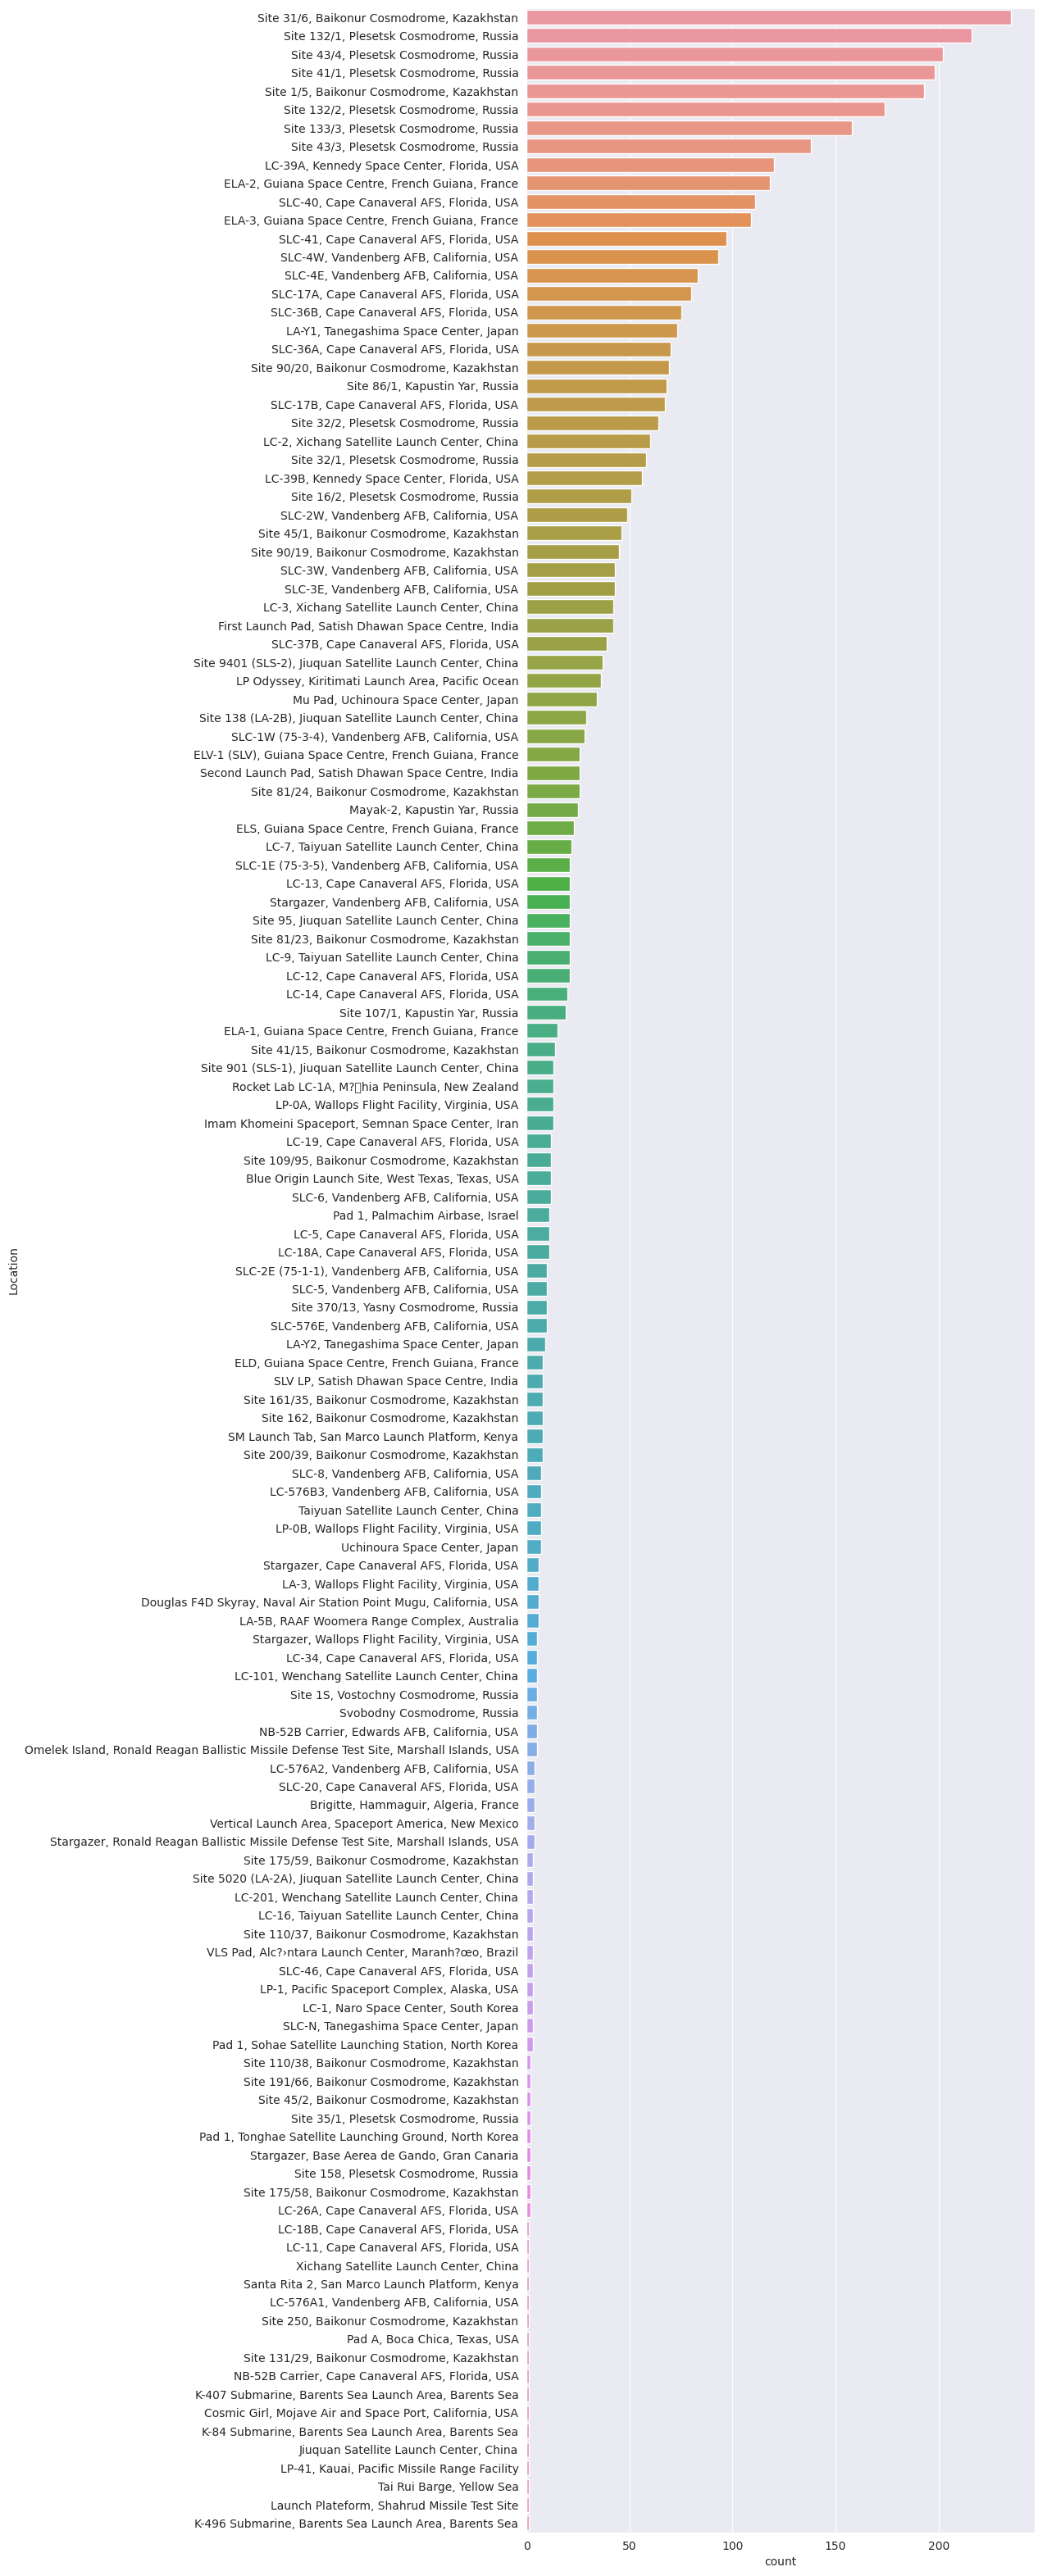

In [15]:
plt.figure(figsize=(8, 40))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)

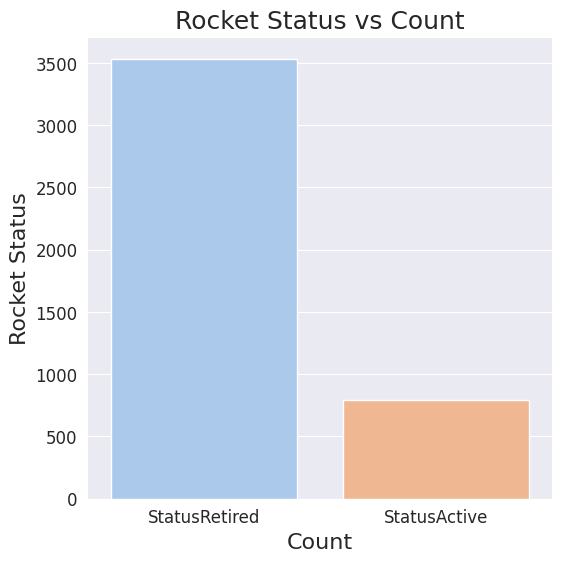

In [16]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Status Rocket', data=df, order=df['Status Rocket'].value_counts().index, palette='pastel')
ax.axes.set_title('Rocket Status vs Count', fontsize=18)
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Rocket Status', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

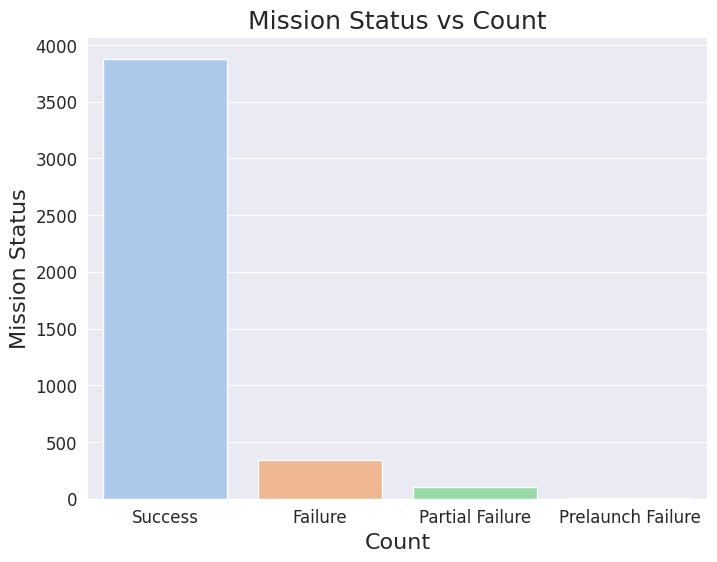

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Status Mission', data=df, order=df['Status Mission'].value_counts().index, palette='pastel')
ax.axes.set_title('Mission Status vs Count', fontsize=18)
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Mission Status', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

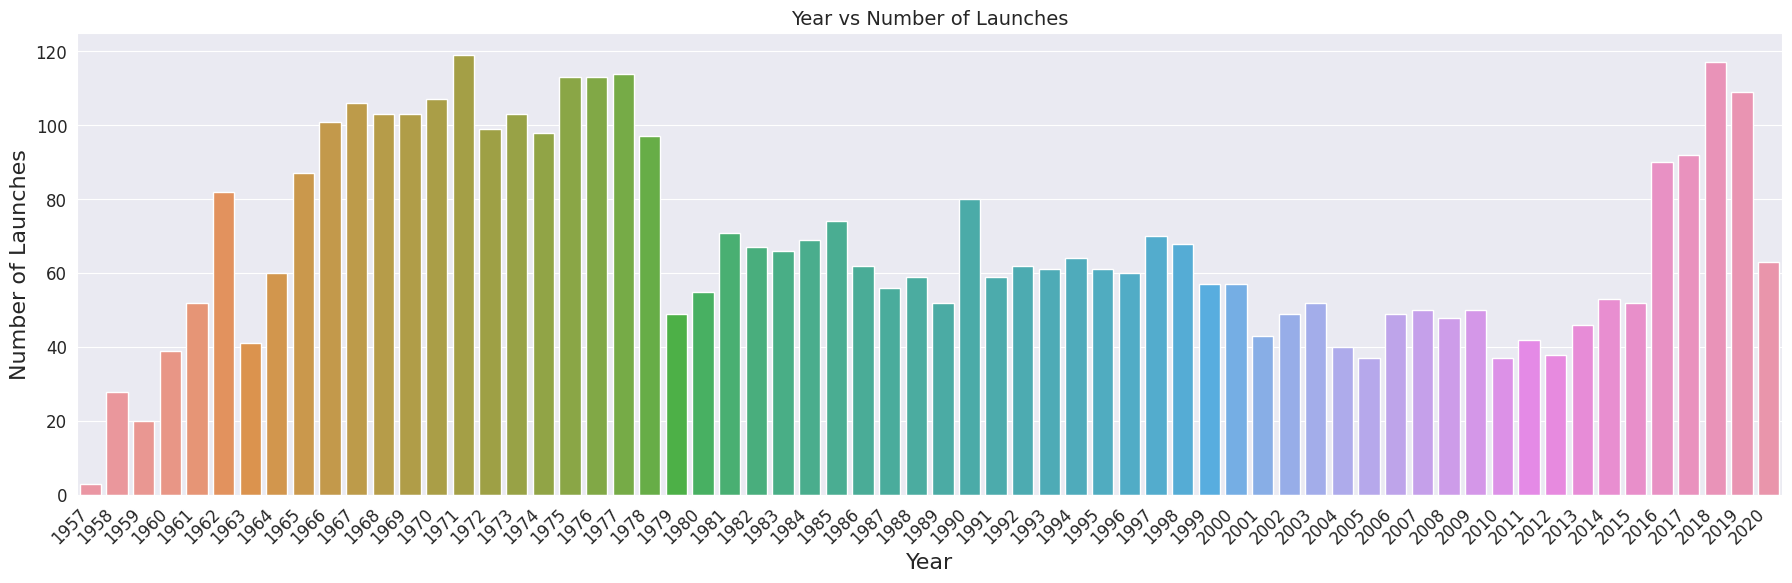

In [18]:
plt.figure(figsize=(22, 6))
ax = sns.countplot(x=df['Year'])
ax.axes.set_title('Year vs Number of Launches', fontsize=14)
ax.set_xlabel('Year', fontsize=16, loc='center')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Number of Launches', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

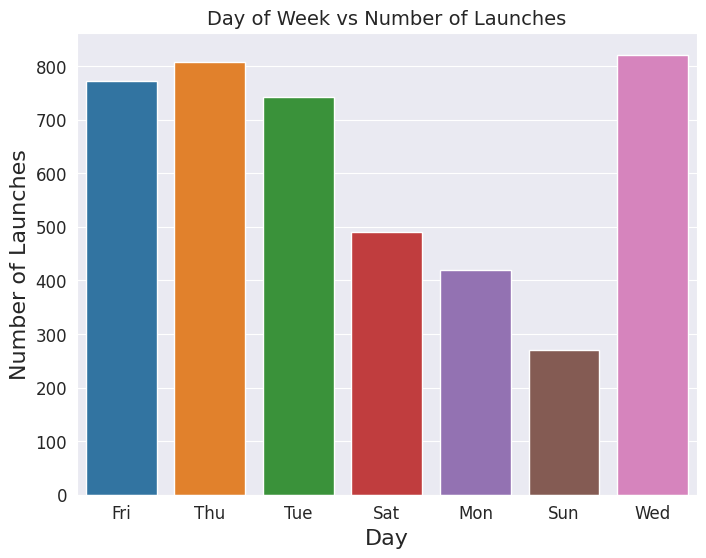

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Day'])
ax.axes.set_title('Day of Week vs Number of Launches', fontsize=14)
ax.set_xlabel('Day', fontsize=16, loc='center')
ax.set_ylabel('Number of Launches', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

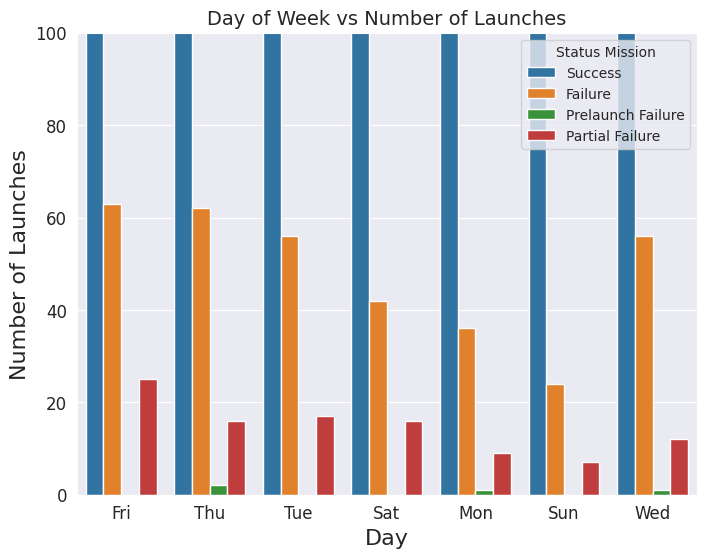

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Day', hue='Status Mission', data=df)
ax.axes.set_title('Day of Week vs Number of Launches', fontsize=14)
ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Number of Launches', fontsize=16)
ax.tick_params(labelsize=12)
plt.ylim(0, 100)
plt.show()

In [21]:
df.head(1)

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country,Day,Month,Date,Hour
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.0


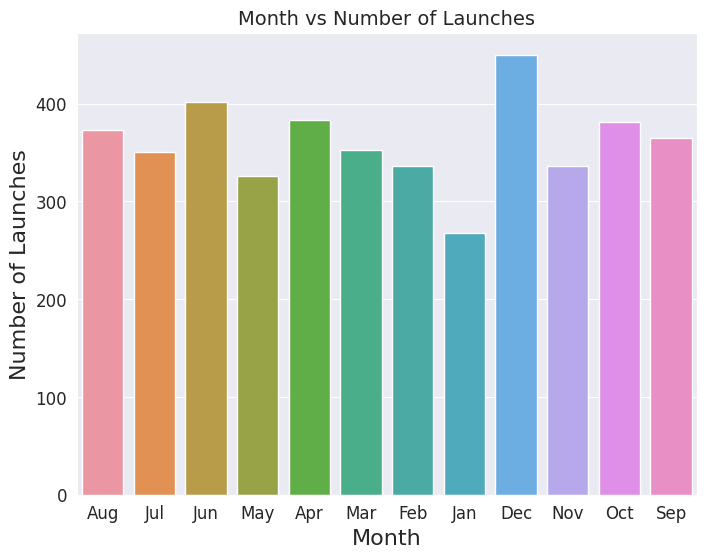

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Month', data=df)
ax.axes.set_title('Month vs Number of Launches', fontsize=14)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Number of Launches', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

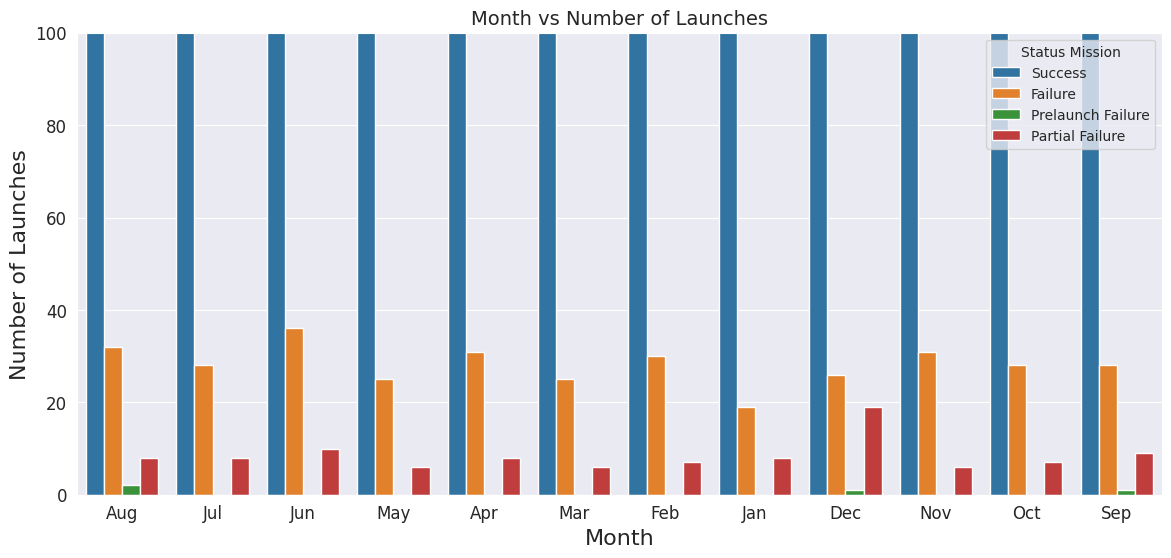

In [23]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Month', hue='Status Mission', data=df)
ax.axes.set_title('Month vs Number of Launches', fontsize=14)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Number of Launches', fontsize=16)
ax.tick_params(labelsize=12)
plt.ylim(0, 100)
plt.show()

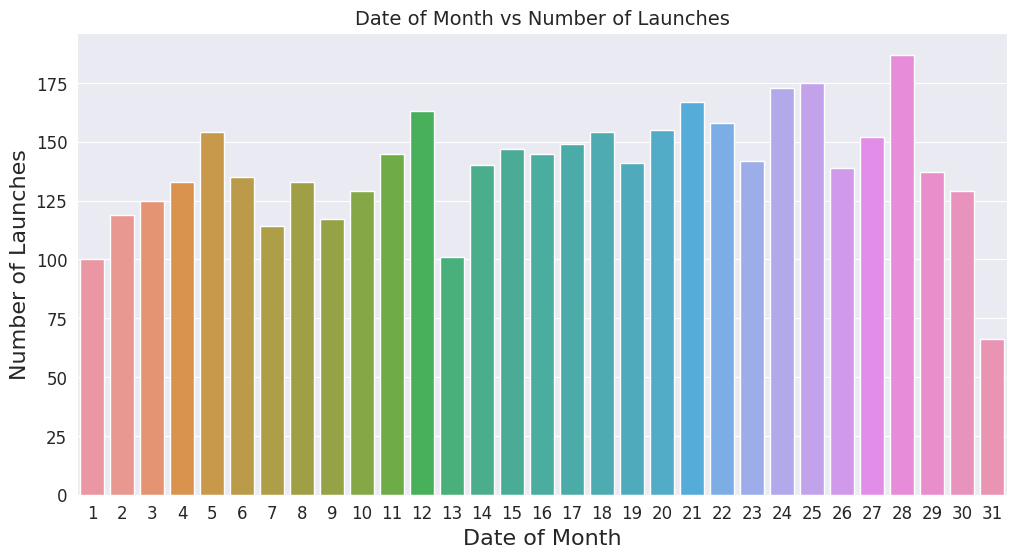

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df['Date'])
ax.axes.set_title('Date of Month vs Number of Launches', fontsize=14)
ax.set_xlabel('Date of Month', fontsize=16)
ax.set_ylabel('Number of Launches', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

In [25]:
def iso(country):
    return countries.get(country).alpha3
df['ISO'] = df.Country.apply(lambda country: iso(country))

In [26]:
iso = df.ISO.value_counts()

In [27]:
px.choropleth(df, locations=iso.index, color=iso.values, hover_name=iso.index, title='Number of Launches', color_continuous_scale='emrld')

In [28]:
#sunburst chart
sun = df.groupby(['Country', 'Company Name', 'Status Mission'])['Datum'].count().reset_index()
sun.head(10)

,Country,Company Name,Status Mission,Datum
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
5,Brazil,AEB,Failure,2
6,Brazil,AEB,Prelaunch Failure,1
7,China,CASC,Failure,14
8,China,CASC,Partial Failure,6
9,China,CASC,Success,231


In [29]:
plt.figure(figsize=(50, 50))
fig = px.sunburst(sun, path=['Country', 'Company Name', 'Status Mission'], values='Datum', title='Sunburst Chart')
fig.show()

<Figure size 5000x5000 with 0 Axes>

In [30]:
df_imp = df[(df['Country']=='USA') | (df['Country']=='Russian Federation') | (df['Country']=='China') | (df['Country']=='France')]

In [31]:
df_imp.head(1)

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country,Day,Month,Date,Hour,ISO
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.0,USA


In [32]:
test = pd.DataFrame(df_imp.groupby(['Country', 'Company Name'])['Location'].count())
test.rename(columns={'Location': 'Mission Numbers'}, inplace=True)

In [33]:
test = test.reset_index()
fig = px.bar(test, x='Mission Numbers', y='Country', color='Company Name', text='Company Name')
fig.update_layout(title='Mission Numbers by Countries and Corp Names', 
                  yaxis = dict(title='Countries', titlefont_size=16, tickfont_size=14,),
                  )
fig.show()

In [34]:
test = pd.DataFrame(df_imp.groupby(['Country', 'Location'])['Location'].count())
test.rename(columns={'Location': 'Mission Number'}, inplace=True)
test = test.reset_index(level=[0, 1])
test = test.sort_values('Mission Number', ascending=False)
fig = px.bar(test, x='Mission Number', y='Location', color='Country')
fig.show()

In [35]:
test = pd.DataFrame(df_imp.groupby(['Country', 'Year'])['Location'].count())
test = test.reset_index(level=[0, 1])
fig = px.bar(test, x='Year', y='Location', color='Country')
fig.show()